In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [46]:
from data import load_data, SubsetWithAttributes
from utils import TRAINPATH, save_pickle, load_pickle, LANDMARK_DICT, DATAPATH, LANDMARKS_ANGLES_DICT, PICKLEDPATH, BODY_POSE_CONNECTIONS, calc_angle
from plot import *
from pose import poses_for_dataset
import numpy as np
import mediapipe as mp
import pandas as pd
from tqdm import tqdm
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 8]

mp_pose = mp.solutions.pose

In [47]:
shuffle = False

# Load the data
dataset, dataloader = load_data(path=TRAINPATH, batch_size=None, shuffle=shuffle, subset=False, classify=False)

In [48]:
df = load_pickle(PICKLEDPATH, "pose_landmark_all_df.pickle")
df_vis = load_pickle(PICKLEDPATH, "pose_landmark_vis_df.pickle")
numpy_data = load_pickle(PICKLEDPATH, "pose_landmark_numpy.pickle")
df_world = load_pickle(PICKLEDPATH, "pose_world_landmark_all_df.pickle")
df_vis_world = load_pickle(PICKLEDPATH, "pose_world_landmark_vis_df.pickle")
numpy_data_world = load_pickle(PICKLEDPATH, "pose_world_landmark_numpy.pickle")
labels_drop_na = load_pickle(PICKLEDPATH, "labels_drop_na.pickle")
annotated_images = load_pickle(PICKLEDPATH, "annotated_images.pickle")

In [49]:
annotated_images = [img for img in annotated_images if img is not None]

In [50]:
indices = df_world.replace(to_replace='None', value=np.nan).dropna().index
dataset_no_null = SubsetWithAttributes(dataset, indices)

In [51]:
df_world = df_world.replace(to_replace='None', value=np.nan).dropna()
df_world = df_world.reset_index(drop=True)

In [52]:
from data import create_angle_features

create_angle_features(df_world)

In [53]:
df_world.columns

Index(['NOSE', 'LEFT_EYE_INNER', 'LEFT_EYE', 'LEFT_EYE_OUTER',
       'RIGHT_EYE_INNER', 'RIGHT_EYE', 'RIGHT_EYE_OUTER', 'LEFT_EAR',
       'RIGHT_EAR', 'MOUTH_LEFT', 'MOUTH_RIGHT', 'LEFT_SHOULDER',
       'RIGHT_SHOULDER', 'LEFT_ELBOW', 'RIGHT_ELBOW', 'LEFT_WRIST',
       'RIGHT_WRIST', 'LEFT_PINKY', 'RIGHT_PINKY', 'LEFT_INDEX', 'RIGHT_INDEX',
       'LEFT_THUMB', 'RIGHT_THUMB', 'LEFT_HIP', 'RIGHT_HIP', 'LEFT_KNEE',
       'RIGHT_KNEE', 'LEFT_ANKLE', 'RIGHT_ANKLE', 'LEFT_HEEL', 'RIGHT_HEEL',
       'LEFT_FOOT_INDEX', 'RIGHT_FOOT_INDEX', 'label', 'quality',
       'LEFT_ELBOW_ANGLE', 'RIGHT_ELBOW_ANGLE', 'LEFT_ARMPIT_ANGLE',
       'RIGHT_ARMPIT_ANGLE', 'LEFT_CHEST_ANGLE', 'RIGHT_CHEST_ANGLE',
       'LEFT_WRIST_ANGLE', 'RIGHT_WRIST_ANGLE', 'LEFT_KNEE_ANGLE',
       'RIGHT_KNEE_ANGLE', 'LEFT_HIPFLEXOR_ANGLE', 'RIGHT_HIPFLEXOR_ANGLE',
       'LEFT_ADDUCTOR_ANGLE', 'RIGHT_ADDUCTOR_ANGLE', 'LEFT_ANKLE_ANGLE',
       'RIGHT_ANKLE_ANGLE'],
      dtype='object')

## Differences Good vs. Bad for Downward Dog?

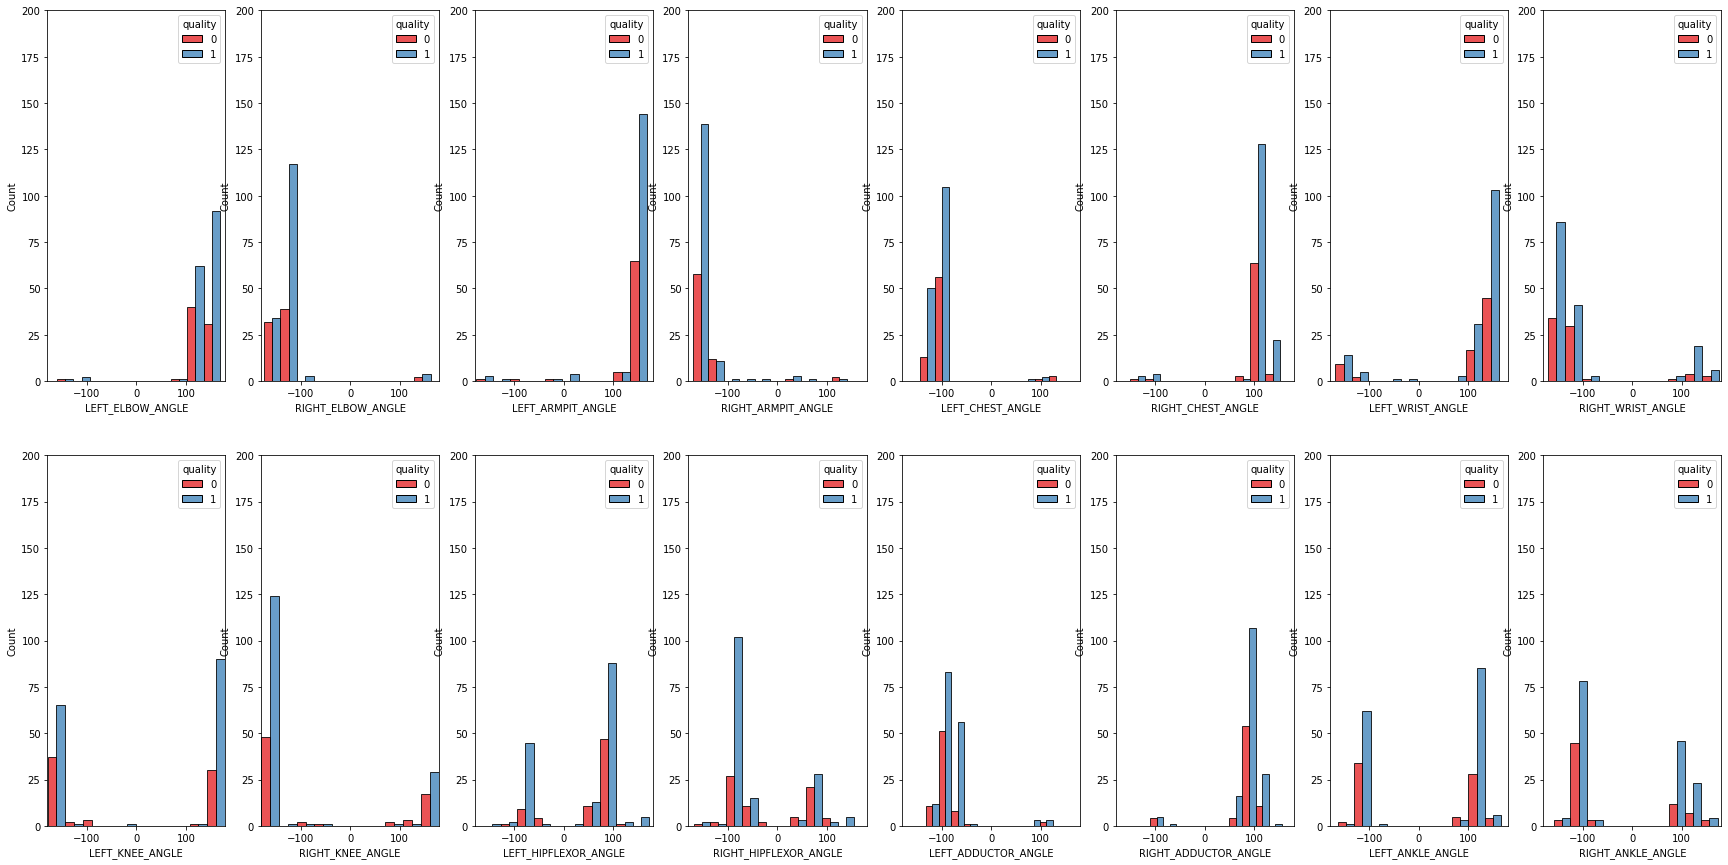

In [70]:
fig, ax = plt.subplots(2, 8, figsize=(30, 15))
sns.set_palette(sns.color_palette("Set1"))
for idx, col in enumerate(LANDMARKS_ANGLES_DICT.keys()):
    y = int(idx/8)
    x = idx % 8
    sns.histplot(df_world.loc[df_world['label']==0], x=col, hue='quality', ax=ax[y, x], bins=10, multiple='dodge')
    ax[y, x].tick_params(axis='x')
    ax[y, x].set_ylim(0,200)
    ax[y, x].set_xlim(-180,180)

## Differences Good vs. Bad for Warrior I?

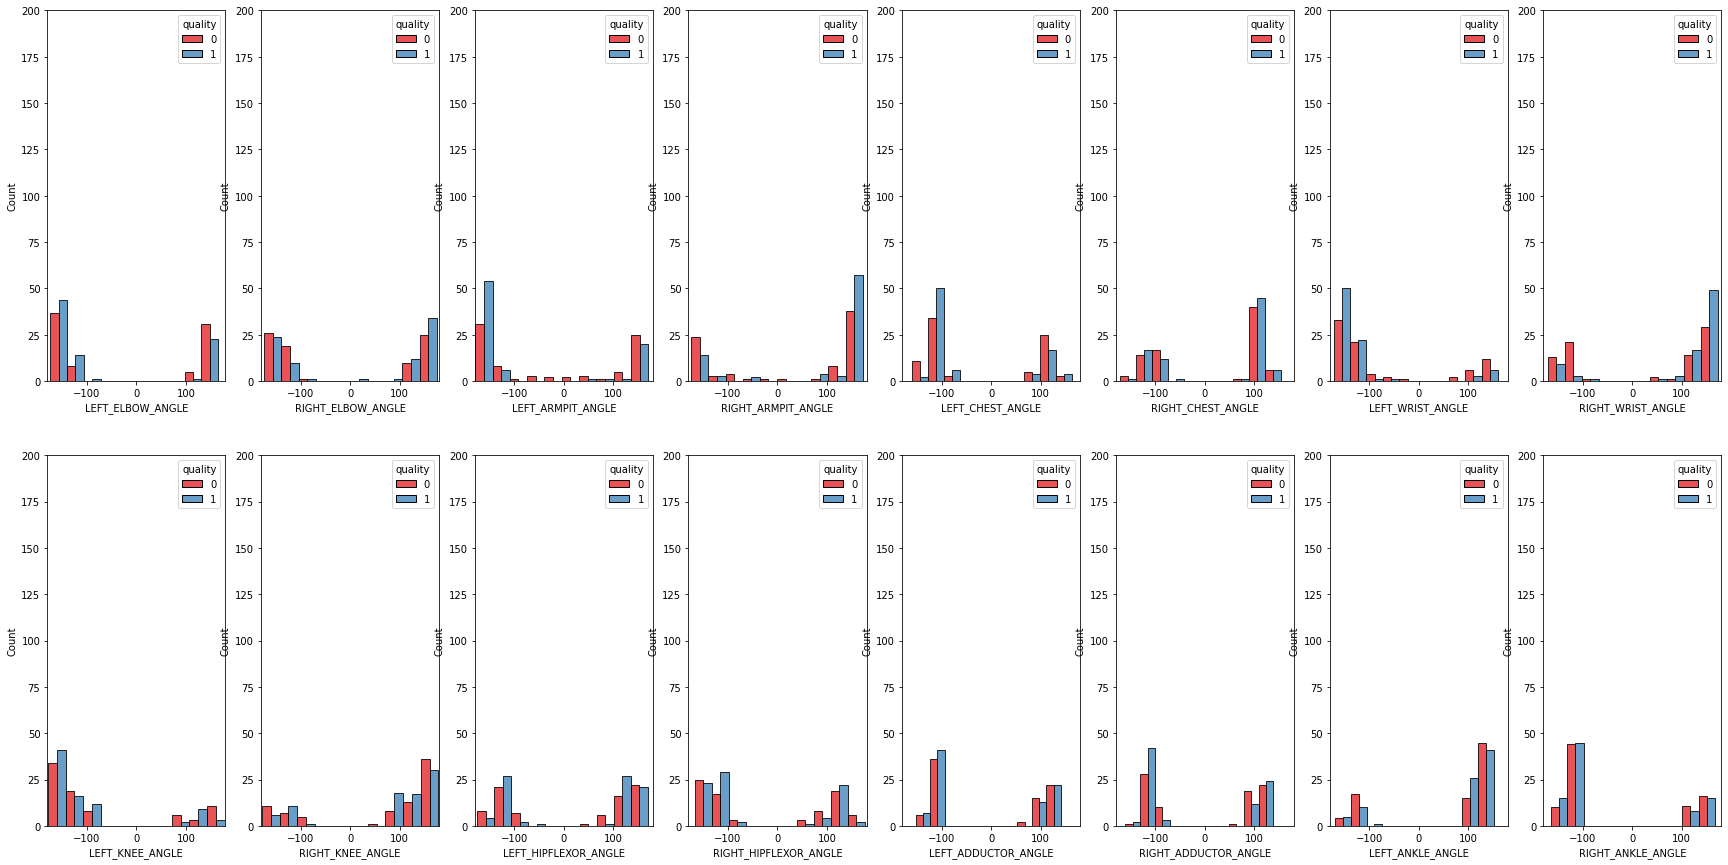

In [100]:
fig, ax = plt.subplots(2, 8, figsize=(30, 15))
sns.set_palette(sns.color_palette("Set1"))
for idx, col in enumerate(LANDMARKS_ANGLES_DICT.keys()):
    y = int(idx/8)
    x = idx % 8
    sns.histplot(df_world.loc[df_world['label']==1], x=col, hue='quality', ax=ax[y, x], bins=10, multiple='dodge')
    ax[y, x].tick_params(axis='x')
    ax[y, x].set_ylim(0,200)
    ax[y, x].set_xlim(-180,180)

In [135]:
df_world[(df_world['RIGHT_HIPFLEXOR_ANGLE'] < 0) & (df_world['quality']==1) & (df_world['label']==1)]['RIGHT_HIPFLEXOR_ANGLE']

400   -114.635641
401   -161.459945
402   -147.048940
404   -121.842811
405    -98.340915
406   -142.112813
407    -90.819701
410   -142.884119
411   -136.875313
412   -121.119828
413   -135.672283
416   -134.815092
417   -132.413873
421   -148.204454
422   -149.180494
424   -151.210318
426   -110.978379
428   -127.572918
429   -112.331088
432   -112.795037
433   -100.411134
434   -131.421314
436   -127.736433
437   -133.594743
438   -120.765689
441   -117.804367
443   -133.421746
444   -124.299175
445   -108.152027
446   -106.111408
447   -102.826569
448   -146.353947
452   -132.802743
453   -136.610988
454   -148.098497
455   -126.107817
456   -141.310975
457   -108.326074
458   -106.404684
460   -137.938402
461   -108.790845
462   -106.404542
464   -112.265359
465   -107.198264
466   -113.638343
469   -134.224815
470   -135.059118
471   -111.410616
472   -113.911841
474   -157.140339
477   -129.703826
479   -167.070643
480   -120.346167
481   -160.973341
Name: RIGHT_HIPFLEXOR_ANGLE,

In [136]:
df_world[(df_world['RIGHT_HIPFLEXOR_ANGLE'] > 0) & (df_world['quality']==1) & (df_world['label']==1)]['RIGHT_HIPFLEXOR_ANGLE']

403    136.608618
408    108.901490
409    104.590259
414    126.689760
415    114.001672
418    132.066907
419    121.024397
420    121.494784
423    121.987378
425    105.853405
427    118.058844
430    116.087021
431    110.497505
435    105.783081
439    133.346218
440    141.761899
442    111.745902
449    122.781032
450    146.089534
451    114.379297
459    117.796929
463    137.255385
467    131.935587
468    138.845077
473    133.932448
475     68.847841
476    100.601473
478    119.482797
482    110.580308
Name: RIGHT_HIPFLEXOR_ANGLE, dtype: float64

In [131]:
vis = np.take(annotated_images,df_world[(df_world['RIGHT_HIPFLEXOR_ANGLE'] > 0) & (df_world['quality']==1) & (df_world['label']==1)]['RIGHT_HIPFLEXOR_ANGLE'].index)
vis2 = np.take(annotated_images,df_world[(df_world['RIGHT_HIPFLEXOR_ANGLE'] < 0) & (df_world['quality']==1) & (df_world['label']==1)]['RIGHT_HIPFLEXOR_ANGLE'].index)

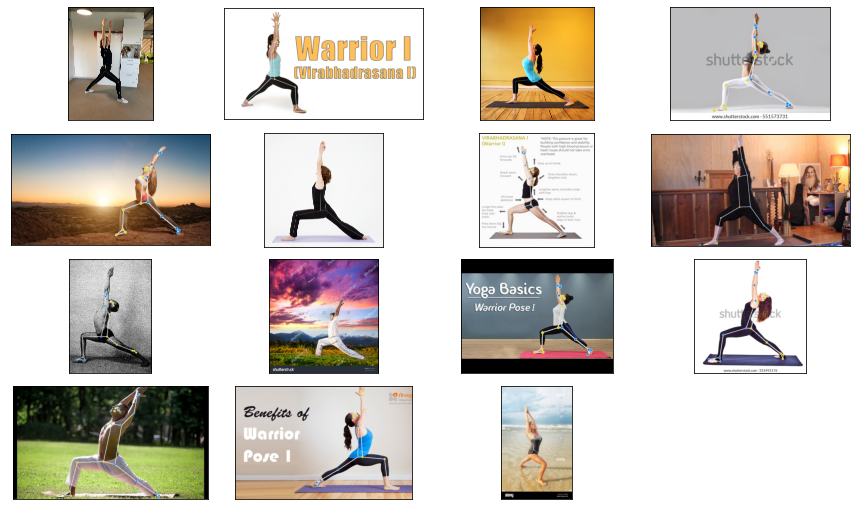

In [132]:
plot_image_grid(vis, 15)

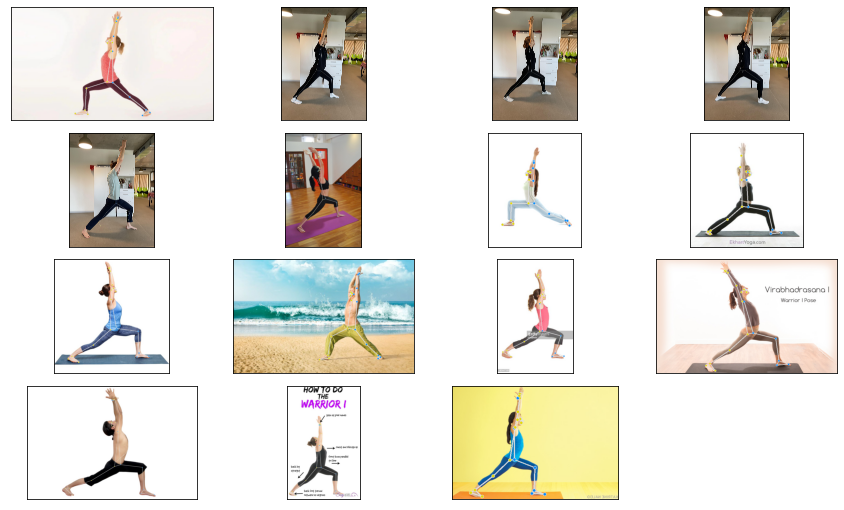

In [133]:
plot_image_grid(vis2, 15)

<IPython.core.display.Javascript object>


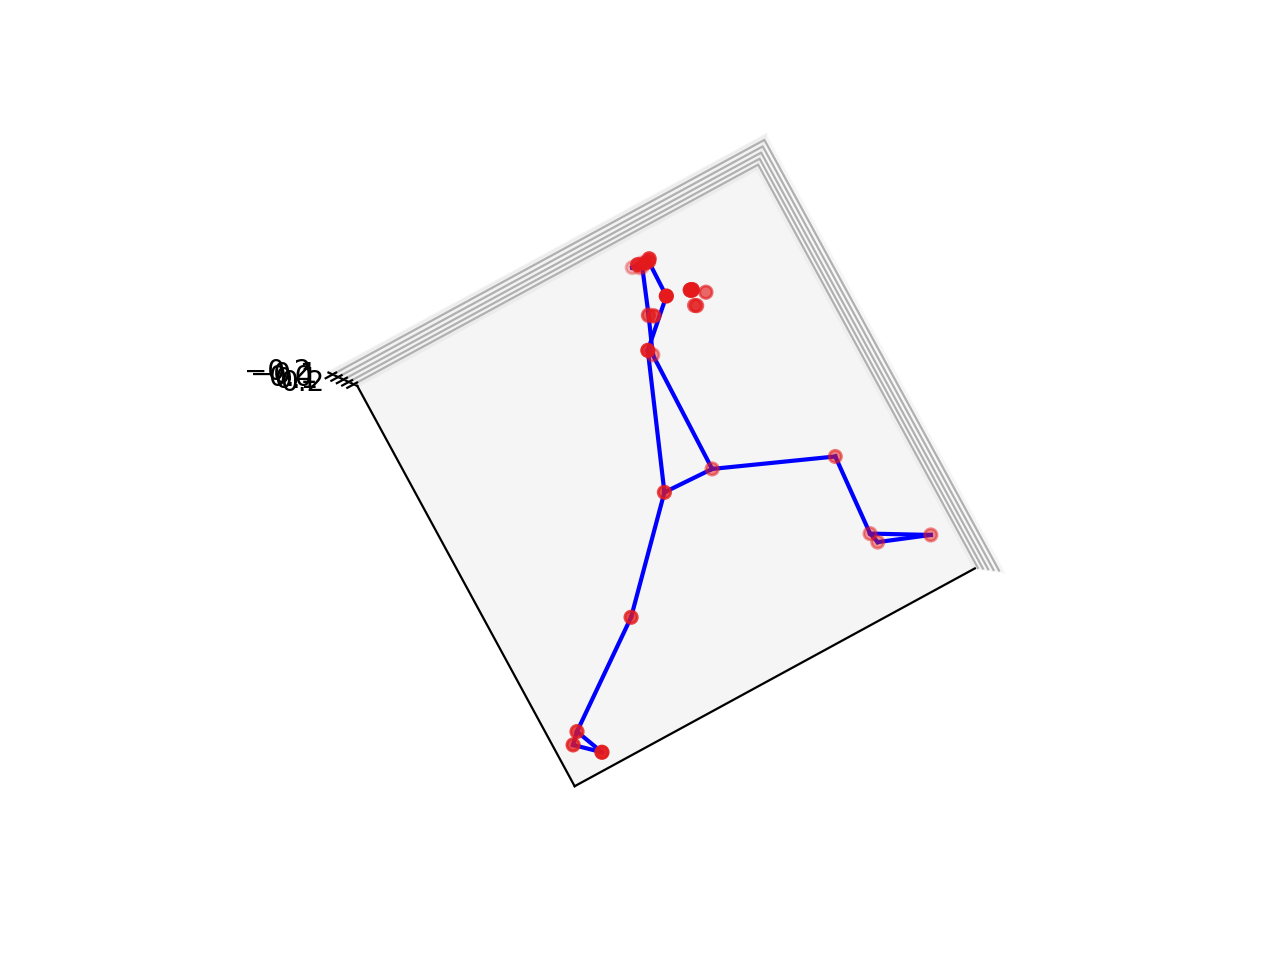

In [155]:
i = 401
plot_3d_keypoints(numpy_data_world[i].T[0], numpy_data_world[i].T[1],numpy_data_world[i].T[2])

## Differences Good vs. Bad for Warrioir II?

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


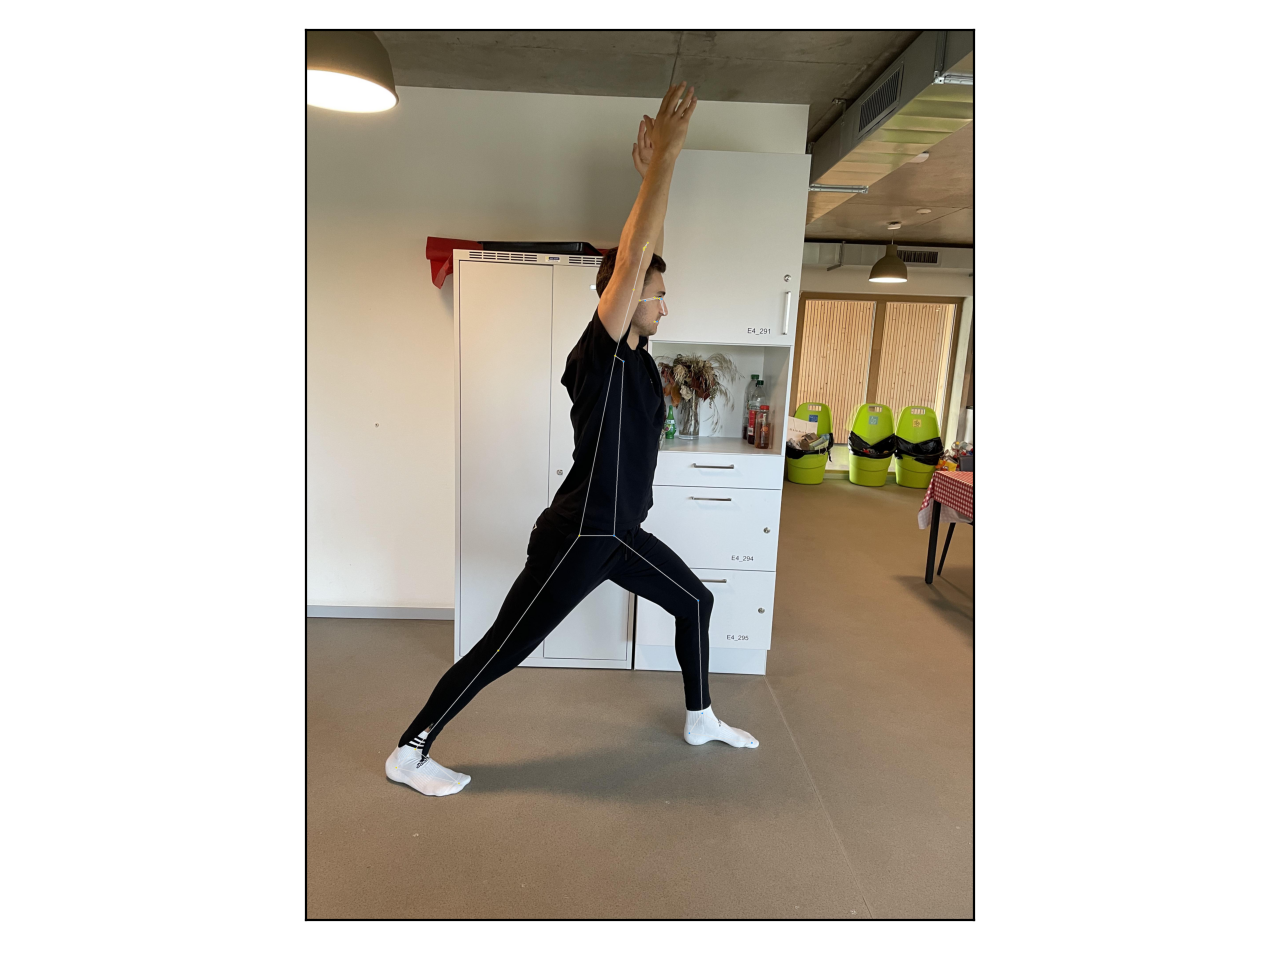

In [157]:
%matplotlib auto
plot_image(annotated_images[401])

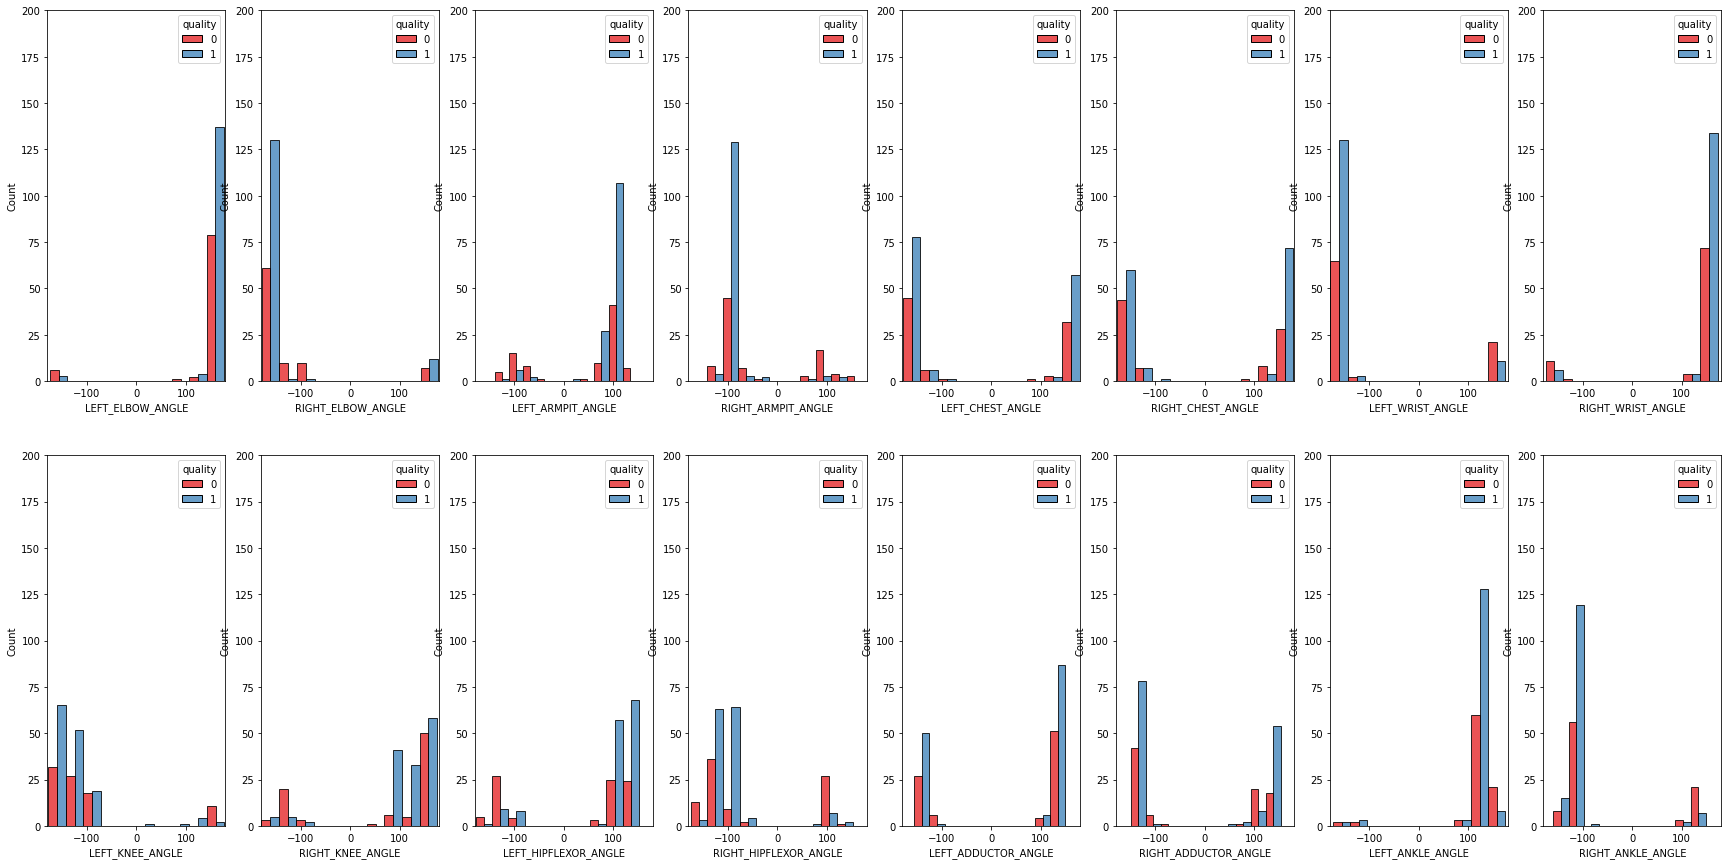

In [101]:
fig, ax = plt.subplots(2, 8, figsize=(30, 15))
sns.set_palette(sns.color_palette("Set1"))
for idx, col in enumerate(LANDMARKS_ANGLES_DICT.keys()):
    y = int(idx/8)
    x = idx % 8
    sns.histplot(df_world.loc[df_world['label']==2], x=col, hue='quality', ax=ax[y, x], bins=10, multiple='dodge')
    ax[y, x].tick_params(axis='x')
    ax[y, x].set_ylim(0,200)
    ax[y, x].set_xlim(-180,180)

In [143]:
def plot_3d_keypoints(x, y, z):
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.scatter3D(x, y, z)
    for i,j in BODY_POSE_CONNECTIONS:
        ax.plot([x[i],x[j]], [y[i],y[j]], [z[i],z[j]], color='b')
    plt.show()

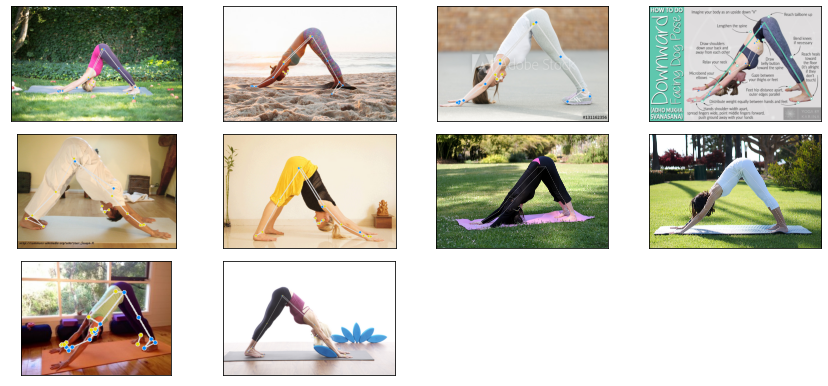

In [144]:
plot_image_grid(annotated_images[380:390], 10)

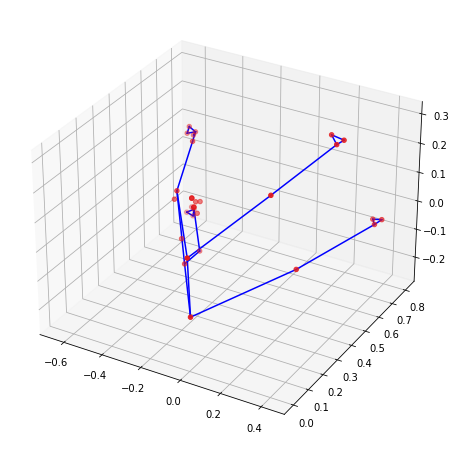

In [146]:
i = 56
plot_3d_keypoints(numpy_data_world[i].T[0], numpy_data_world[i].T[1],numpy_data_world[i].T[2])

In [147]:
# assuming already normalized

def calc_2d_angles(vec_2d):
    return np.degrees(np.arctan2(vec_2d[1], vec_2d[0]))

def calc_xyz_angles(vec):
    xy_points = vec[0:2]
    yz_points = vec[1:3]
    
    xy_angle = calc_2d_angles(xy_points)
    yz_angle = calc_2d_angles(yz_points)
    
    return xy_angle, yz_angle

def calc_xyz_dist(vec):
    xy_points = vec[0:2]
    yz_points = vec[1:3]
    
    xy_dist = np.linalg.norm(xy_points, axis=0)
    yz_dist = np.linalg.norm(yz_points, axis=0)
    
    return xy_dist, yz_dist

def calc_xyz_points(xy_angle, xy_dist, yz_angle, yz_dist):
    x, y1 = calc_2d_points(xy_angle, xy_dist)
    y2, z = calc_2d_points(yz_angle, yz_dist)
    
    return x, y1, z
    
def calc_2d_points(angle, dist):
    a = dist * np.cos(np.radians(angle))
    b = dist * np.sin(np.radians(angle))
    return a, b

In [148]:
%matplotlib notebook

In [153]:
def compare_two_figures(length_fig_idx, angle_fig_idx, df, annotated_images, plot=True):
    RIGHT_HIP = 24
    
    #normalize based on right hip
    length_fig = df[length_fig_idx] - np.tile(df[length_fig_idx][RIGHT_HIP], (df[length_fig_idx].shape[0],1))
    angle_fig = df[angle_fig_idx] - np.tile(df[angle_fig_idx][RIGHT_HIP], (df[angle_fig_idx].shape[0],1))
    
    plot_image_grid([annotated_images[length_fig_idx], annotated_images[angle_fig_idx]], 2)
    
    xy_dist, yz_dist = calc_xyz_dist(length_fig.T)
    xy_angle, yz_angle = calc_xyz_angles(angle_fig.T)
    
    px, py, pz = calc_xyz_points(xy_angle, xy_dist, yz_angle, yz_dist)
    lx, ly, lz = length_fig.T[0], length_fig.T[1], length_fig.T[2]
    angx, angy, angz = angle_fig.T[0], angle_fig.T[1], angle_fig.T[2]
    
    if plot:
        fig = plt.figure()
        ax = plt.axes(projection="3d")
        ax.scatter3D(px, py, pz)
        ax.scatter3D(lx, ly, lz)
        ax.scatter3D(angx, angy, angz)
        #ax.plot(points[0],points[1],points[2],color = 'g')
        for i,j in BODY_POSE_CONNECTIONS:
            ax.plot([px[i],px[j]], [py[i],py[j]], [pz[i],pz[j]], color='r')
            ax.plot([lx[i],lx[j]], [ly[i],ly[j]], [lz[i],lz[j]], color='g')
            ax.plot([angx[i],angx[j]], [angy[i],angy[j]], [angz[i],angz[j]], color='b')
        plt.show()
    

<IPython.core.display.Javascript object>


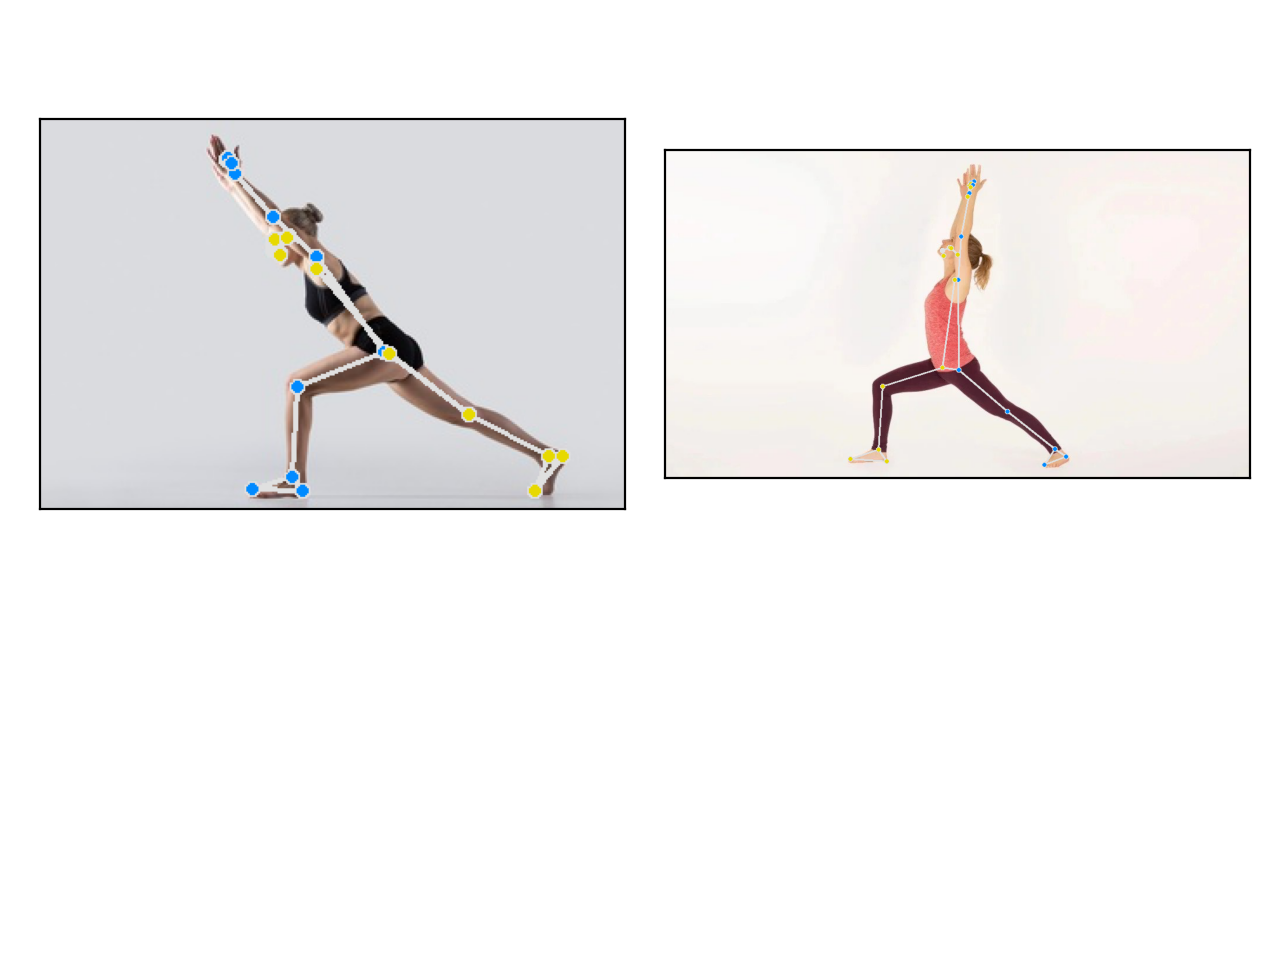

<IPython.core.display.Javascript object>


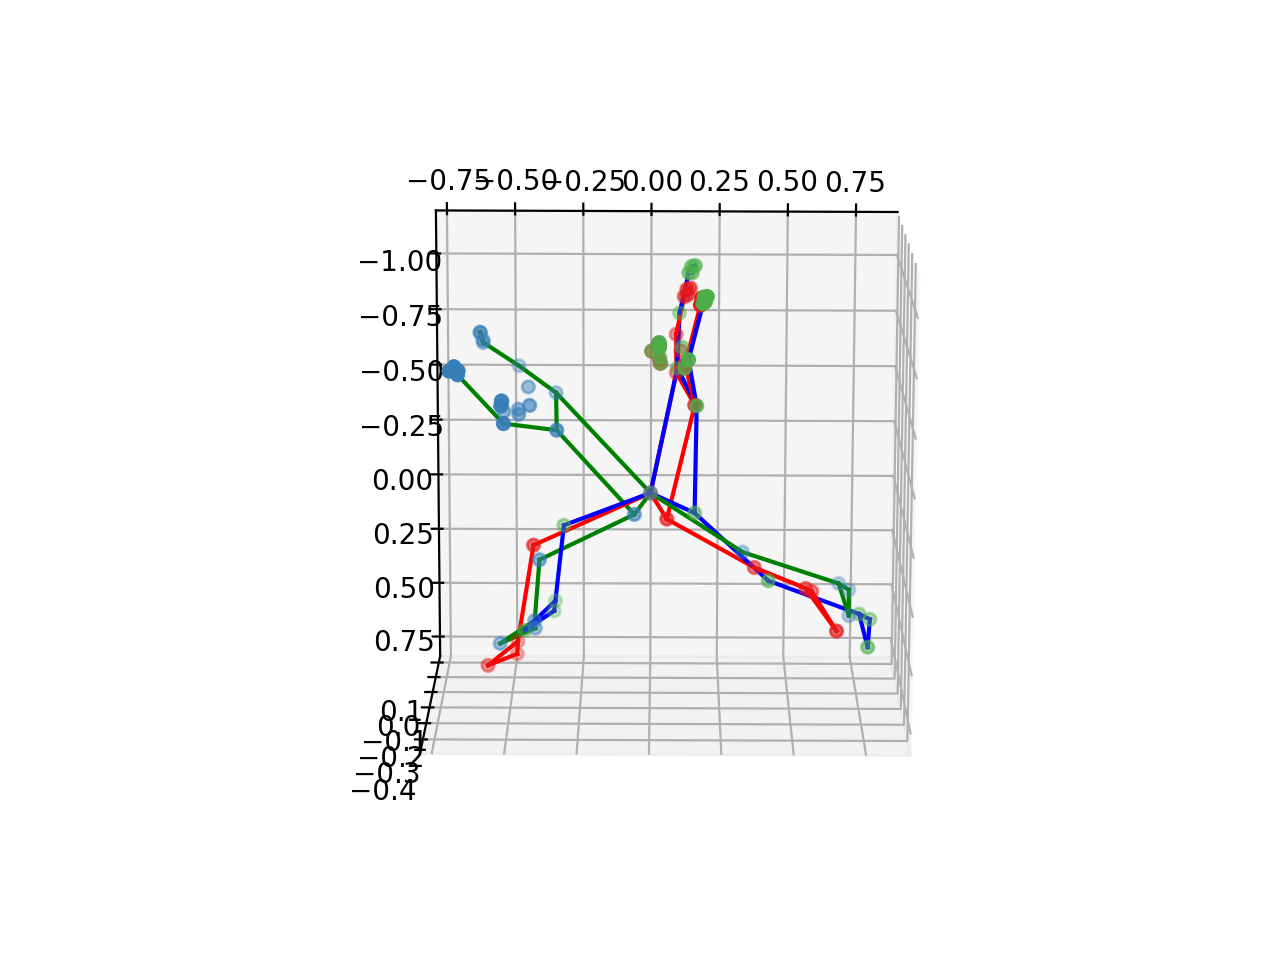

In [154]:
compare_two_figures(121, 400, numpy_data_world, annotated_images)